In [ ]:
Part1: supervised learning

Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Prepare your dataset for the modelling phase
Apply Decision tree, and plot its ROC curve
Try to improve your model performance by changing the model hyperparameters

Part2: unsupervised learning
Drop out the target variable
Apply K means clustering and plot the clusters
Find the optimal K parameter
Interpret the results

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Necessary Libraries and Load Data
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVR  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans  # Import KMeans from scikit-learn for clustering
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn for data scaling


In [3]:
#1. Import Data and Perform Basic Data Exploration
import pandas as pd

# Load the dataset
df=pd.read_csv('Microsoft_malware_dataset_min.csv')

# Display basic information about the dataset
print(df.info())
print(df.head())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB
None
   HasDetections  Wdft_IsGamer  Census_IsVirtualDevice Census_OSEdition  \
0              0           0.0                     0

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [4]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

79581


In [5]:
num_fts = df.select_dtypes(include='number').columns
num_fts

Index(['HasDetections', 'Wdft_IsGamer', 'Census_IsVirtualDevice',
       'Census_HasOpticalDiskDrive', 'Firewall', 'SMode', 'IsProtected',
       'CountryIdentifier'],
      dtype='object')

In [6]:
df.describe(include = "object").T

,count,unique,top,freq
Census_OSEdition,20419,19,Core,7389
OsPlatformSubRelease,20419,9,rs4,6124


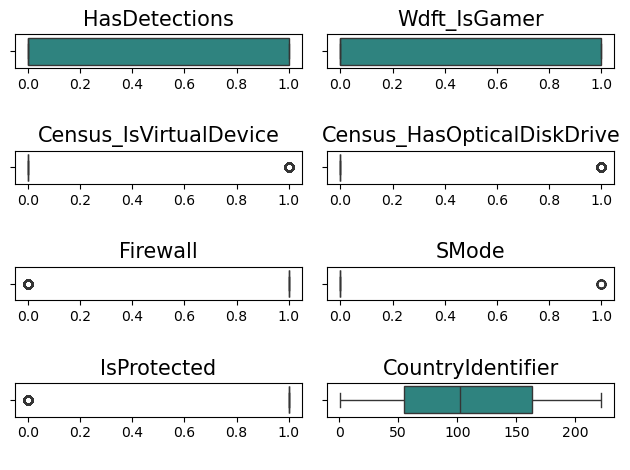

In [7]:
#2.plt.figure(figsize=(30, 15))

# Adjust the number of rows and columns
for i in range(0, len(num_fts)):
    plt.subplot(len(num_fts) // 2 + len(num_fts) % 2, 2, i + 1)  # 2 subplots per row
    sns.boxplot(x=df[num_fts[i]], palette='viridis')
    plt.title(num_fts[i], fontsize=15)
    plt.xlabel(' ')

# Display all subplots together
plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

In [8]:
df['HasDetections'] = pd.to_numeric(df['HasDetections'], errors='coerce')

In [ ]:
df = df.drop('Wdft_IsGamer', axis = 1)
df = df.drop('Census_IsVirtualDevice', axis = 1)
df = df.drop('CountryIdentifier', axis = 1)
df = df.drop('Census_HasOpticalDiskDrive', axis = 1)
df = df.drop('SMode', axis = 1)

In [11]:
# Check for NaN values  
df.isna().sum() 

HasDetections             0
Census_OSEdition          0
Firewall                471
IsProtected             343
OsPlatformSubRelease      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20419 entries, 0 to 99962
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HasDetections         20419 non-null  int64  
 1   Census_OSEdition      20419 non-null  object 
 2   Firewall              19948 non-null  float64
 3   IsProtected           20076 non-null  float64
 4   OsPlatformSubRelease  20419 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 957.1+ KB


In [13]:
df['HasDetections'].describe()

count    20419.000000
mean         0.468485
std          0.499018
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HasDetections, dtype: float64

In [14]:
df = df.dropna()

In [15]:
# Example: One-hot encoding
dummies = pd.get_dummies(df['OsPlatformSubRelease'], prefix = 'OS')
df = df.join(dummies)
df = df.drop('OsPlatformSubRelease', axis = 1)

In [16]:
# 5. Encode Categorical Features
# Example: Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Census_OSEdition'] = le.fit_transform(df['Census_OSEdition'])

In [17]:
#7. Prepare Dataset for Modeling
from sklearn.model_selection import train_test_split

# Assuming 'target' is the column you want to predict
X = df.drop('HasDetections', axis=1)
y = df['HasDetections']

# Split the Dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

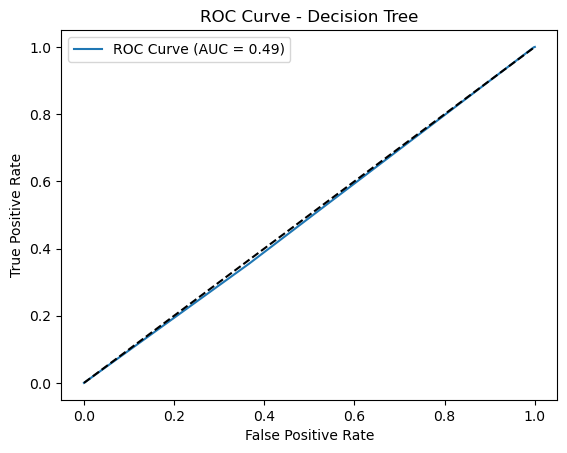

In [19]:
#8. Apply Decision Tree and Plot ROC Curve
#Train a Decision Tree and plot its ROC curve:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

In [20]:
# 9.Improve Model Performance (Hyperparameter Tuning)
#You can tune the hyperparameters using GridSearchCV to find the best combination:

from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Evaluate model
y_prob_best = best_clf.predict_proba(X_test)[:,1]
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)

print(f"Improved ROC AUC: {roc_auc_best}")

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Improved ROC AUC: 0.5165850988943963


### Unsupervised learning

In [21]:
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import OneHotEncoder  

In [22]:
# 1.Drop the Target Variable
#In unsupervised learning, we don’t use the target variable (the labels). So, we’ll drop it from the dataset.

# Drop the target variable
X_unsupervised = df.drop('HasDetections', axis=1)

In [23]:
X_unsupervised.columns

Index(['Census_OSEdition', 'Firewall', 'IsProtected', 'OS_prers5', 'OS_rs1',
       'OS_rs2', 'OS_rs3', 'OS_rs4', 'OS_th1', 'OS_th2', 'OS_windows7',
       'OS_windows8.1'],
      dtype='object')

In [24]:
X_scaled = scaler.fit_transform(X)

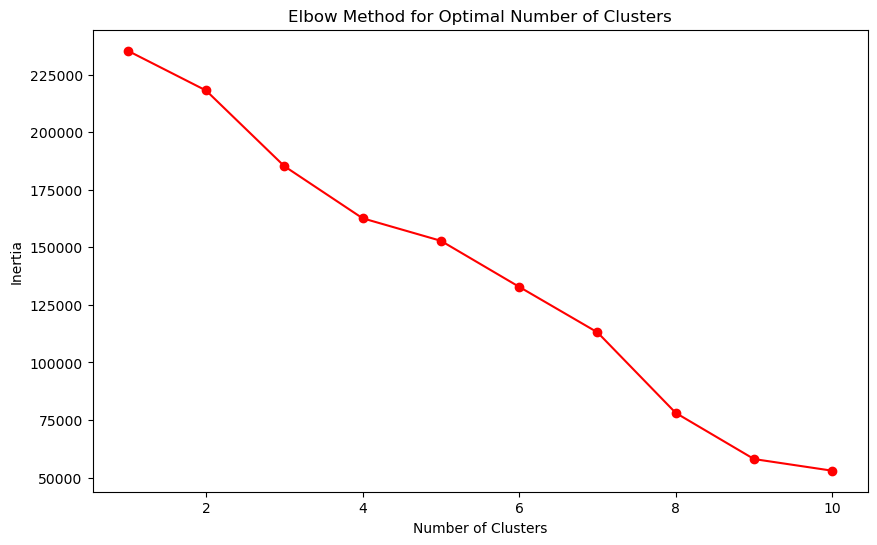

In [25]:
inertia = []  # List to store the inertia values for each number of clusters

for i in range(1, 11):  # Loop over cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)  # Initialize KMeans with the current number of clusters (i)
    kmeans.fit(X_scaled)  # Fit the KMeans model on the standardized data
    inertia.append(kmeans.inertia_)  # Append the inertia (sum of squared distances) to the list

# Plot the Elbow curve
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.plot(range(1, 11), inertia, 'ro-')  # Plot the number of clusters against inertia with red markers and lines
# 'r': Specifies the color of the plot, in this case, red (r stands for red).
# 'o': Specifies the marker style, which in this case is a circle (o).
# '-': Specifies the line style, which in this case is a solid line (-).

plt.title('Elbow Method for Optimal Number of Clusters')  # Add a title to the plot
plt.xlabel('Number of Clusters')  # Label the x-axis as 'Number of Clusters'
plt.ylabel('Inertia')  # Label the y-axis as 'Inertia' (within-cluster sum of squares)
plt.show()  # Display the plot

In [26]:
kmeans = KMeans(n_clusters=6, random_state=42)  # Initialize the KMeans algorithm with 5 clusters and a fixed random state for reproducibility
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

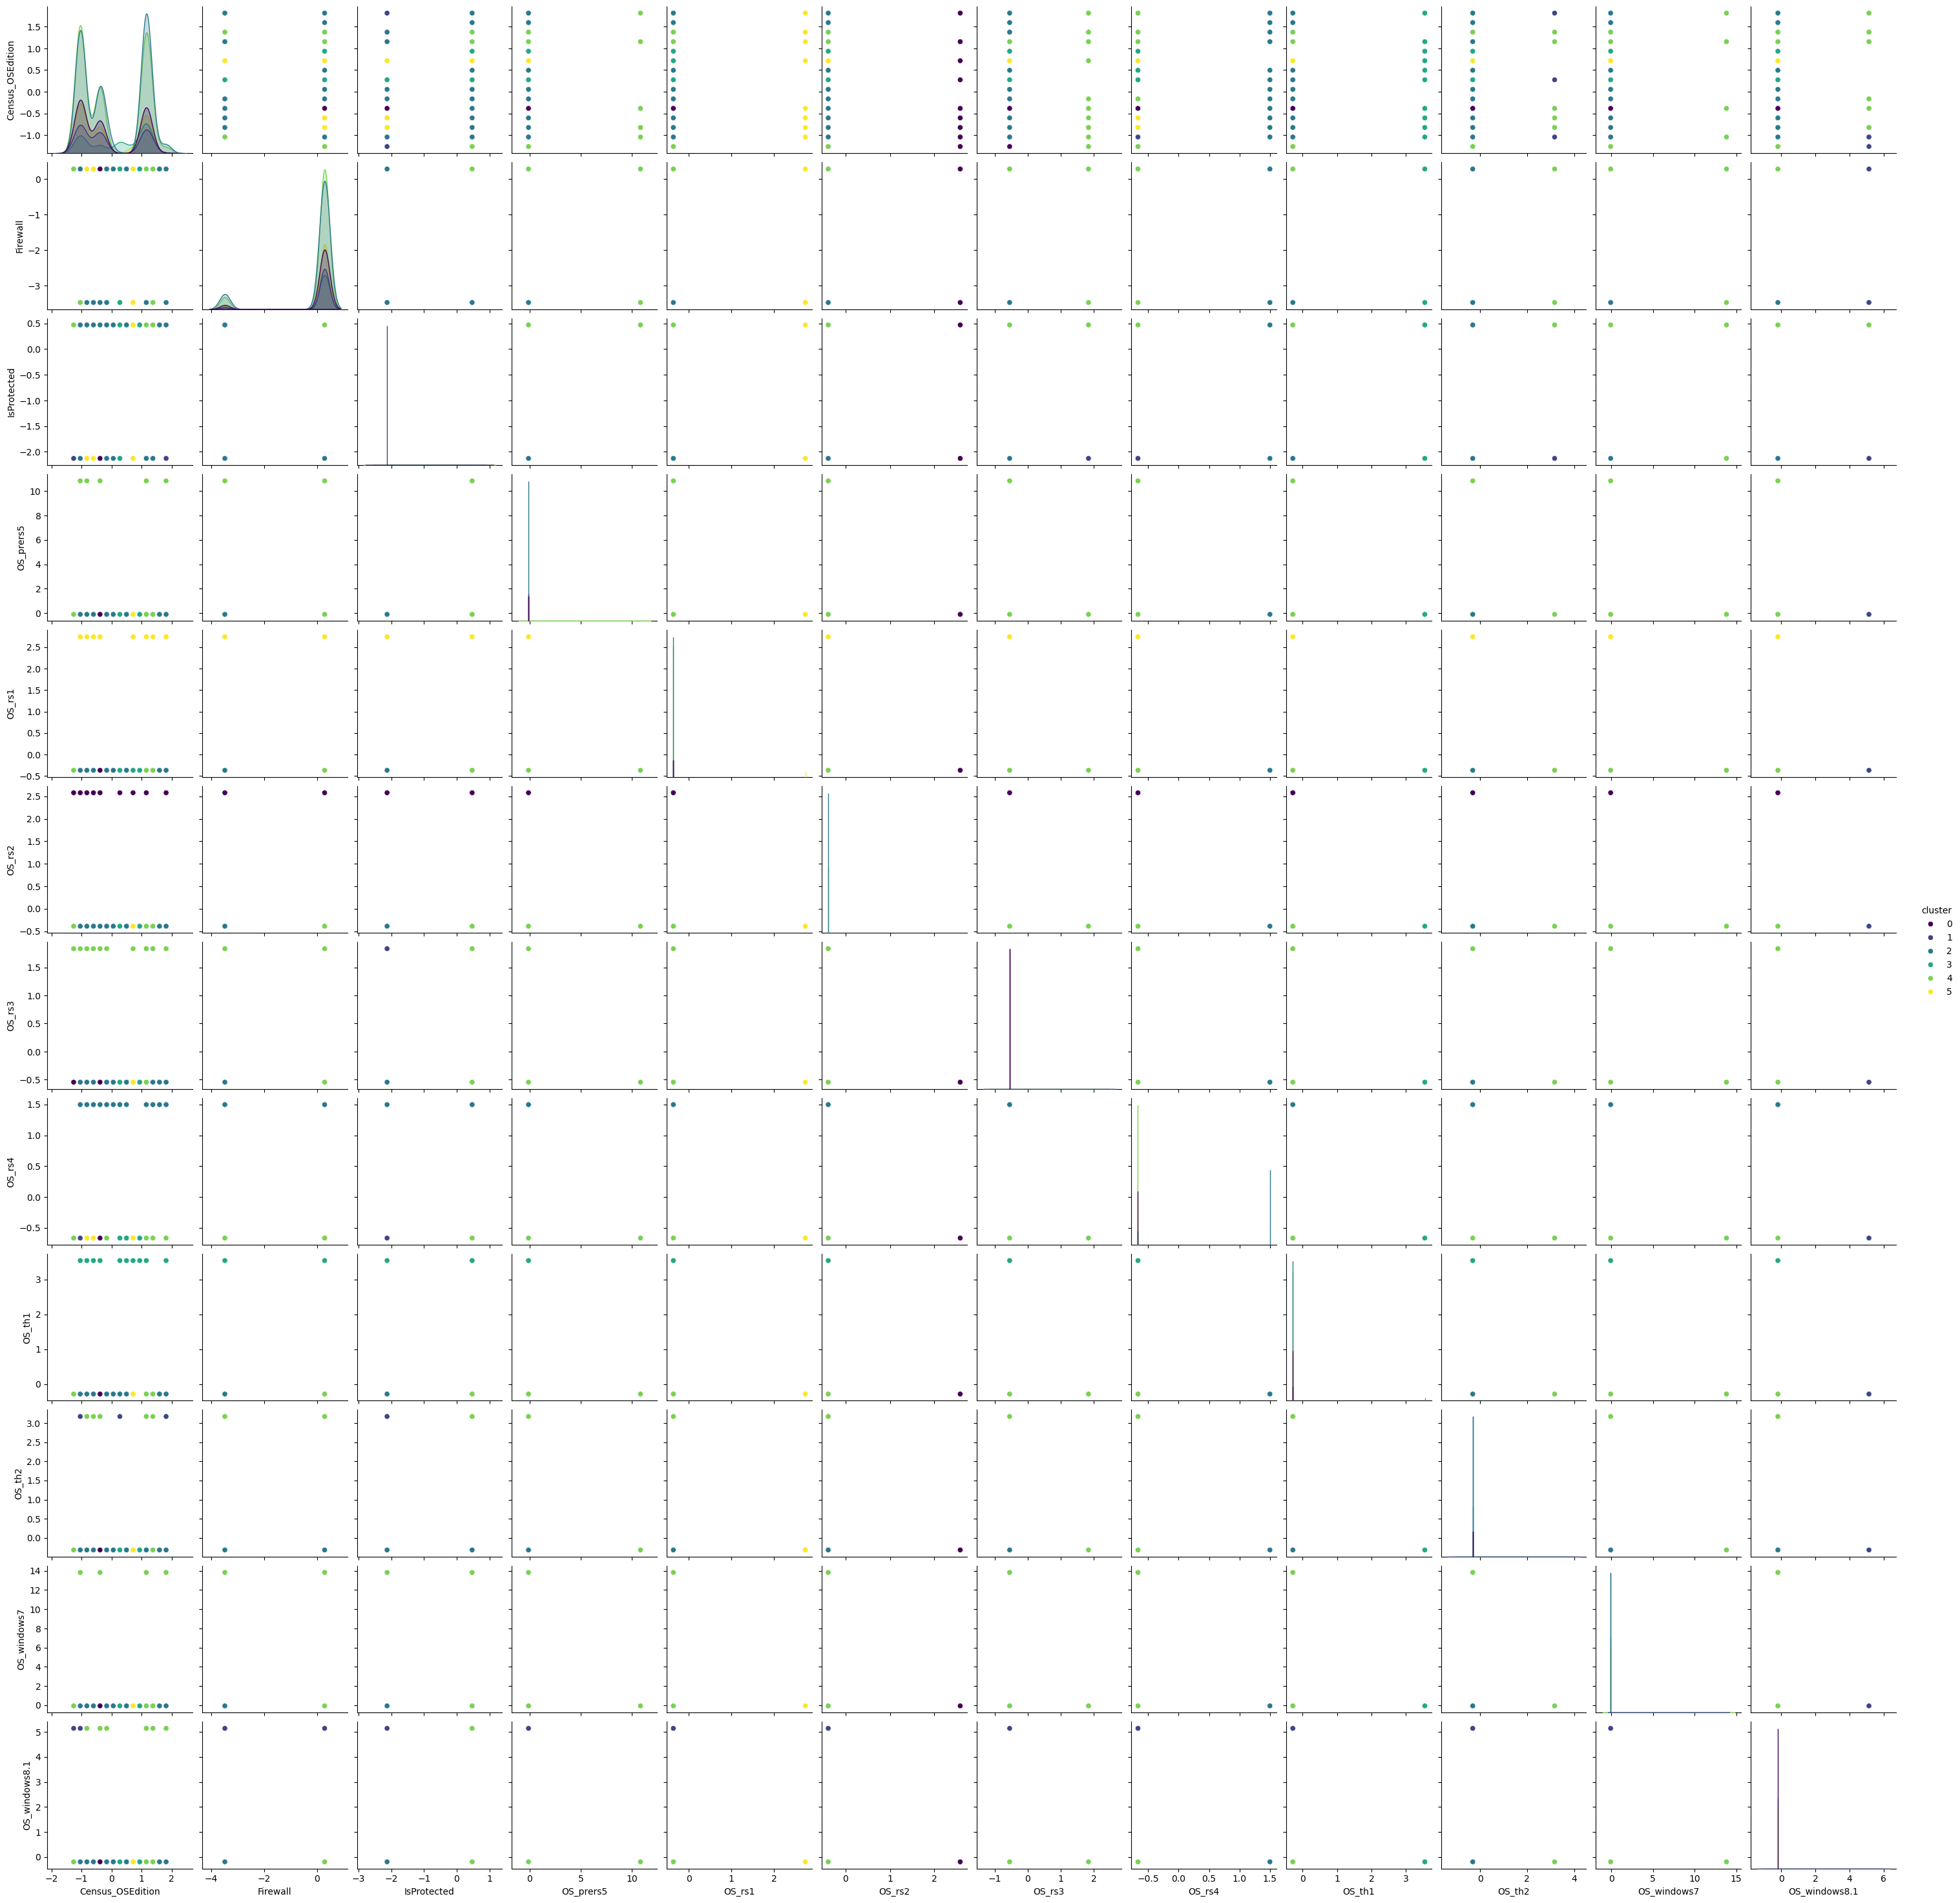

In [30]:
import seaborn as sns
import pandas as pd

# Assuming X_scaled is a DataFrame or a scaled numpy array, and 'kmeans.labels_' contains the cluster labels
# Add cluster labels to the DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=['Census_OSEdition', 'Firewall', 'IsProtected', 'OS_prers5', 'OS_rs1',
       'OS_rs2', 'OS_rs3', 'OS_rs4', 'OS_th1', 'OS_th2', 'OS_windows7',
       'OS_windows8.1'])

# Add the cluster labels to the DataFrame
X_scaled_df['cluster'] = kmeans.labels_

# Pair plot with clusters
sns.pairplot(X_scaled_df, hue='cluster', palette='viridis', diag_kind='kde')

In [31]:
# Interpretation of Results  
optimal_k = np.argmin(np.diff(np.diff(inertia))) + 2  # Finding the elbow point (rough estimate)  
print(f'Optimal number of clusters based on the Elbow Method: {optimal_k}')  

Optimal number of clusters based on the Elbow Method: 2


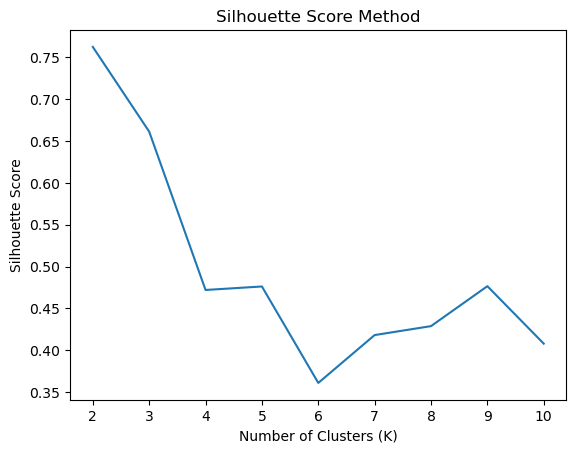

In [33]:
#Silhouette Score:
#Silhouette score measures how close each point in one cluster is to the points in the neighboring clusters. The optimal K has the highest average silhouette score.

from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # Check for K=2 to K=10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_unsupervised)
    score = silhouette_score(X_unsupervised, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()
#Once you plot both, you'll look for the elbow point in the WCSS plot and/or the highest silhouette score to decide the best value for K.

#.Interpret the Results
Clusters: Each cluster represents a group of machines that are similar in terms of their features. By examining the characteristics of the machines in each cluster, you can try to interpret what makes each group different. For example, certain clusters may have machines with certain properties (e.g., a particular version of the operating system, specific hardware, or certain installed software) that make them more likely to get infected by malware.

Cluster Centers: K-means provides cluster centers (centroids) which are the "average" points of each cluster. These can help in understanding the typical machine in each cluster.

Number of Clusters (K): The optimal number of clusters (K) is the one where the clusters are tight enough (low WCSS) but still meaningful (clear distinction between clusters). The elbow method or silhouette score will guide you in picking this value.